In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_parquet('CLEANED_SWIM_DATA.parquet')



In [10]:
def mean_of_top_5(series):
    return series.nlargest(5).mean()

# Create the pivot table with the custom aggregation function
college_high_school_top_5 = df.pivot_table(values='Points', index='ID', columns='isHS', aggfunc=mean_of_top_5)

# Add a new column for the difference between False and True averages
college_high_school_top_5['Difference'] = college_high_school_top_5[False] - college_high_school_top_5[True]

# Display the pivot table with the new 'Difference' column
college_high_school_top_5

isHS,False,True,Difference
ID,,,
2870,536.937873,445.036733,91.901139
3480,472.204731,626.388524,-154.183793
7361,491.092349,703.538597,-212.446247
19185,689.648739,854.481919,-164.833180
31849,561.879957,566.791539,-4.911583
...,...,...,...
2968147,493.061416,253.895904,239.165511
3008853,530.157948,229.529546,300.628403
3017695,599.290616,172.140176,427.150440


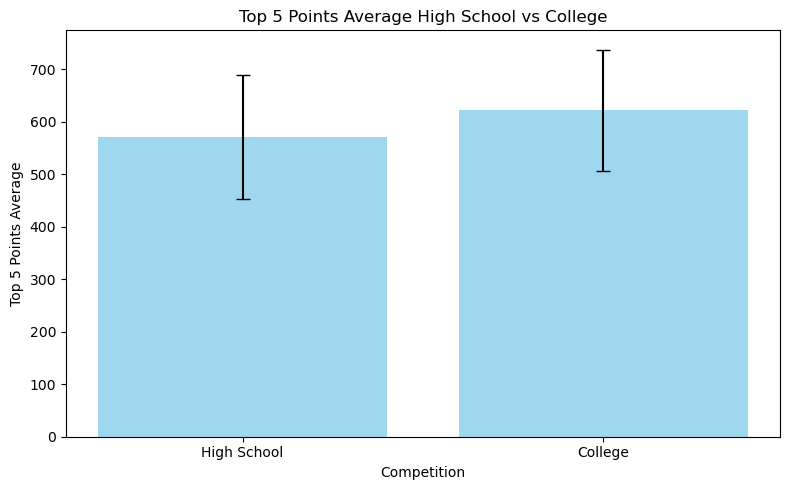

In [6]:
college_high_school_top_5['Difference'] = college_high_school_top_5['Difference'].replace([float('inf'), -float('inf')], float('nan'))
college_high_school_top_5 = college_high_school_top_5.dropna(subset=['Difference'])
mean_difference = college_high_school_top_5['Difference'].mean()
mean_difference
college_high_school_top_5['Difference'].median()
college_high_school_top_5['Difference'].std()

data = {
    'Category': ['High School', 'College'],
    'Mean Improvement': [college_high_school_top_5[True].mean(), college_high_school_top_5[False].mean()],
    'Standard Deviation': [college_high_school_top_5[True].std(), college_high_school_top_5[False].std()],
}

# Create a pandas DataFrame
df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.bar(df_plot['Category'], df_plot['Mean Improvement'], yerr=df_plot['Standard Deviation'], capsize=5, color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel('Competition')
plt.ylabel('Top 5 Points Average')
plt.title('Top 5 Points Average High School vs College')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_parquet('CLEANED_SWIM_DATA.parquet')

def mean_of_top_5(series):
    return series.nlargest(5).mean()

# Create the pivot table with the custom aggregation function
college_high_school_top_5 = df.pivot_table(values='Points', index='ID', columns='isHS', aggfunc=mean_of_top_5)

# Add a new column for the difference between False and True averages
college_high_school_top_5['Difference'] = college_high_school_top_5[False] - college_high_school_top_5[True]

# Display the pivot table with the new 'Difference' column
college_high_school_top_5

mean_improvement = []
std_improvement = []

comparing_division = df.pivot_table(values='Points', index='ID', columns='Division', aggfunc=mean_of_top_5)
comparing_division.head(8)

comparing_division_d3 = comparing_division.dropna(subset=["III"])
comparing_division_d3.head()

comparing_division_d3['Difference'] = comparing_division_d3['III'] - comparing_division_d3['HS']
comparing_division_d3.head()

comparing_division_d3['Difference'] = comparing_division_d3['Difference'].replace([float('inf'), -float('inf')], float('nan'))
comparing_division_d3 = comparing_division_d3.dropna(subset=['Difference'])
mean_difference = comparing_division_d3['Difference'].mean()
mean_improvement.append(mean_difference)
mean_difference

comparing_division_d3['Difference'].median()

std_improvement.append(comparing_division_d3['Difference'].std())
comparing_division_d3['Difference'].std()

comparing_division_d2 = comparing_division.dropna(subset=["II"])
comparing_division_d2['Difference'] = comparing_division_d2['II'] - comparing_division_d2['HS']
comparing_division_d2['Difference'] = comparing_division_d2['Difference'].replace([float('inf'), -float('inf')], float('nan'))
comparing_division_d2 = comparing_division_d2.dropna(subset=['Difference'])
mean_difference = comparing_division_d2['Difference'].mean()
mean_improvement.append(mean_difference)
mean_difference

comparing_division_d2['Difference'].median()

std_improvement.append(comparing_division_d2['Difference'].std())
comparing_division_d2['Difference'].std()

comparing_division_d1 = comparing_division.dropna(subset=["I"])
comparing_division_d1['Difference'] = comparing_division_d1['I'] - comparing_division_d2['HS']
comparing_division_d1['Difference'] = comparing_division_d1['Difference'].replace([float('inf'), -float('inf')], float('nan'))
comparing_division_d1 = comparing_division_d1.dropna(subset=['Difference'])
mean_difference = comparing_division_d1['Difference'].mean()
mean_improvement.append(mean_difference)
mean_difference

comparing_division_d1['Difference'].median()

std_improvement.append(comparing_division_d1['Difference'].std())
comparing_division_d1['Difference'].std()

data = {
    'Category': ['III', 'II', 'I'],
    'Mean Improvement': mean_improvement,
    'Standard Deviation': std_improvement 
}

# Create a pandas DataFrame
df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.bar(df_plot['Category'], df_plot['Mean Improvement'], yerr=df_plot['Standard Deviation'], capsize=5, color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel('Division')
plt.ylabel('Mean Improvement')
plt.title('Division Improvement')

# Show the plot
plt.tight_layout()
plt.show()

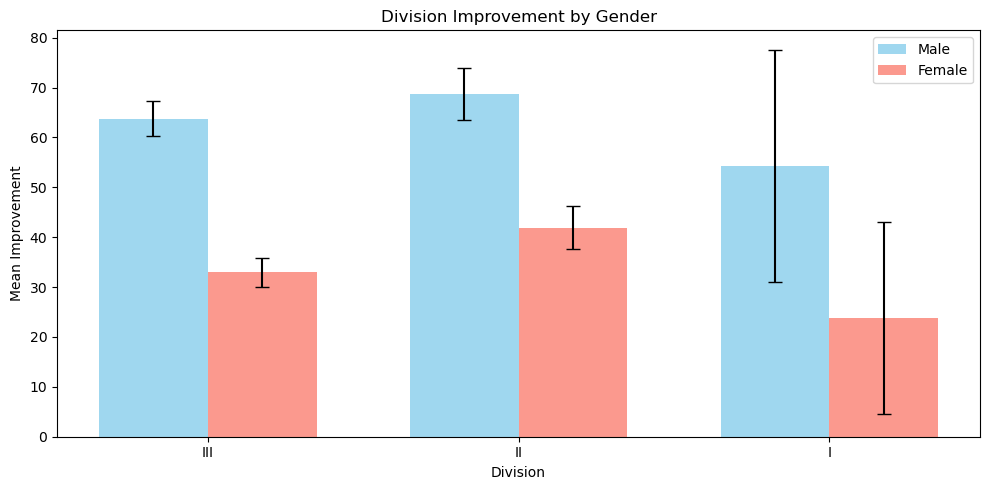

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Read in the dataset
df = pd.read_parquet('CLEANED_SWIM_DATA.parquet')

# Filter the data by gender
df1 = df[df['Gender'] == 'M']  # Male data
df2 = df[df['Gender'] == 'F']  # Female data

# Define the function for calculating the mean of the top 5 points
def mean_of_top_5(series):
    return series.nlargest(5).mean()

# Function to perform the analysis and plotting
def analyze_and_plot(df_filtered, gender_label):
    mean_improvement = []
    std_improvement = []
    categories = []
    n_swimmers = []  # List to store the number of swimmers for CI calculation

    # Create the pivot table with the custom aggregation function
    comparing_division = df_filtered.pivot_table(values='Points', index='ID', columns='Division', aggfunc=mean_of_top_5)

    # Division III Analysis
    comparing_division_d3 = comparing_division.dropna(subset=["III"])
    comparing_division_d3['Difference'] = comparing_division_d3['III'] - comparing_division_d3['HS']
    comparing_division_d3['Difference'] = comparing_division_d3['Difference'].replace([float('inf'), -float('inf')], float('nan'))
    comparing_division_d3 = comparing_division_d3.dropna(subset=['Difference'])
    mean = comparing_division_d3['Difference'].mean()
    std = comparing_division_d3['Difference'].std()
    n = len(comparing_division_d3)  # Number of swimmers
    ci = 1.96 * (std / (n ** 0.5))  # Confidence interval
    mean_improvement.append(mean)
    std_improvement.append(ci)  # Using CI instead of std
    categories.append(f"III")

    # Division II Analysis
    comparing_division_d2 = comparing_division.dropna(subset=["II"])
    comparing_division_d2['Difference'] = comparing_division_d2['II'] - comparing_division_d2['HS']
    comparing_division_d2['Difference'] = comparing_division_d2['Difference'].replace([float('inf'), -float('inf')], float('nan'))
    comparing_division_d2 = comparing_division_d2.dropna(subset=['Difference'])
    mean = comparing_division_d2['Difference'].mean()
    std = comparing_division_d2['Difference'].std()
    n = len(comparing_division_d2)  # Number of swimmers
    ci = 1.96 * (std / (n ** 0.5))  # Confidence interval
    mean_improvement.append(mean)
    std_improvement.append(ci)  # Using CI instead of std
    categories.append(f"II")

    # Division I Analysis
    comparing_division_d1 = comparing_division.dropna(subset=["I"])
    comparing_division_d1['Difference'] = comparing_division_d1['I'] - comparing_division_d2['HS']
    comparing_division_d1['Difference'] = comparing_division_d1['Difference'].replace([float('inf'), -float('inf')], float('nan'))
    comparing_division_d1 = comparing_division_d1.dropna(subset=['Difference'])
    mean = comparing_division_d1['Difference'].mean()
    std = comparing_division_d1['Difference'].std()
    n = len(comparing_division_d1)  # Number of swimmers
    ci = 1.96 * (std / (n ** 0.5))  # Confidence interval
    mean_improvement.append(mean)
    std_improvement.append(ci)  # Using CI instead of std
    categories.append(f"I")

    # Return the data to be used for plotting
    return categories, mean_improvement, std_improvement

# Analyze and get data for Male (df1)
categories_male, mean_improvement_male, std_improvement_male = analyze_and_plot(df1, 'Male')

# Analyze and get data for Female (df2)
categories_female, mean_improvement_female, std_improvement_female = analyze_and_plot(df2, 'Female')

# Ensure the lengths match for both genders and divisions
assert len(mean_improvement_male) == len(mean_improvement_female)
assert len(std_improvement_male) == len(std_improvement_female)
assert len(categories_male) == len(categories_female)

# Create a pandas DataFrame for the combined data
df_plot_combined = pd.DataFrame({
    'Category': categories_male,  # Same categories for both genders
    'Mean Improvement (M)': mean_improvement_male,
    'CI (M)': std_improvement_male,
    'Mean Improvement (F)': mean_improvement_female,
    'CI (F)': std_improvement_female
})

# Define positions for male and female bars, ensuring proper separation
bar_width = 0.35  # Width of the bars
x = range(len(categories_male))  # Set x as the positions for the divisions

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Male bars in blue
ax.bar([i - bar_width / 2 for i in x], df_plot_combined['Mean Improvement (M)'], yerr=df_plot_combined['CI (M)'], 
       capsize=5, color='skyblue', alpha=0.8, width=bar_width, label='Male')

# Female bars in salmon
ax.bar([i + bar_width / 2 for i in x], df_plot_combined['Mean Improvement (F)'], yerr=df_plot_combined['CI (F)'], 
       capsize=5, color='salmon', alpha=0.8, width=bar_width, label='Female')

# Labels and title
ax.set_xticks(x)  # Set the x-ticks for 3 divisions (I, II, III)
ax.set_xticklabels(categories_male)  # Use the categories for x-tick labels
ax.set_xlabel('Division')
ax.set_ylabel('Mean Improvement')
ax.set_title('Division Improvement by Gender')
ax.legend()

plt.tight_layout()
plt.show()
